AUSTRALIA / NEW-ZEALAND

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
import scipy

In [3]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Australia/New Zealand
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 927 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [4]:
both_2010_2050_medium_fertility


,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,1546.980,1549.665,1613.325,1723.457,1791.215,1778.882,1700.642,1772.833,1831.398,1836.259,...,1590.048,1425.814,1062.872,809.331,626.636,496.230,301.671,119.975,32.708,5.097
2015,1610.175,1569.680,1563.453,1648.353,1800.051,1883.905,1856.407,1754.726,1805.478,1846.186,...,1739.184,1551.773,1362.429,981.503,705.669,496.480,333.745,155.862,44.002,7.815
2020,1701.028,1632.965,1583.562,1598.766,1725.631,1893.399,1961.862,1910.710,1788.219,1821.455,...,1817.297,1699.511,1486.490,1262.508,860.654,564.401,339.733,177.364,59.307,11.043
2025,1731.351,1723.863,1646.896,1619.024,1676.465,1819.575,1971.841,2016.432,1944.233,1805.053,...,1830.160,1777.981,1631.159,1382.221,1112.843,694.186,391.934,185.204,69.633,15.394
2030,1720.128,1754.246,1737.817,1682.439,1696.956,1770.833,1898.578,2026.864,2050.176,1960.951,...,1808.684,1792.964,1709.710,1521.409,1225.037,905.521,489.288,219.083,75.186,19.133
2035,1696.500,1743.099,1768.241,1773.424,1760.542,1791.599,1850.282,1954.203,2061.128,2067.085,...,1794.882,1774.141,1727.430,1599.153,1354.800,1005.365,647.610,279.994,91.641,21.796
2040,1700.796,1719.552,1757.143,1803.937,1851.670,1855.392,1871.344,1906.396,1989.194,2078.678,...,1949.766,1762.440,1712.334,1620.296,1430.256,1120.349,729.141,379.181,120.526,26.859
2045,1738.965,1723.912,1733.648,1792.942,1882.382,1946.706,1935.372,1927.792,1941.992,2007.715,...,2056.156,1915.838,1703.635,1610.363,1455.624,1191.243,823.019,436.458,167.911,35.748
2050,1789.802,1762.128,1738.046,1769.534,1871.578,1977.641,2026.860,1992.050,1963.767,1961.297,...,2069.874,2022.030,1854.349,1605.797,1452.688,1221.236,885.795,502.896,198.767,50.623


In [5]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,1117.000,884.000,733.000,691.000,785.000,824.000,750.000,762.000,682.000,600.000,...,491.000,435.000,342.000,234.000,148.000,114.997,-,-,-,-
1955,1237.808,1172.995,921.852,762.390,731.474,858.000,879.907,786.250,787.246,688.606,...,507.224,452.407,385.657,271.089,173.423,132.551,-,-,-,-
1960,1380.908,1275.172,1217.325,954.109,822.486,800.546,905.199,909.169,803.524,790.558,...,563.274,473.543,400.757,320.018,198.417,155.548,-,-,-,-
1965,1487.193,1443.794,1342.967,1274.362,1018.971,895.770,848.394,939.316,941.389,807.970,...,652.392,527.156,432.246,330.276,236.341,192.858,-,-,-,-
1970,1505.231,1558.180,1502.895,1389.109,1326.623,1083.302,952.340,884.998,956.904,938.726,...,749.267,609.224,469.411,360.812,248.314,223.170,-,-,-,-
1975,1556.879,1543.425,1582.910,1522.975,1402.680,1371.577,1121.236,972.005,900.812,943.755,...,750.849,683.976,540.537,397.536,262.235,250.057,-,-,-,-
1980,1380.649,1550.549,1602.641,1585.616,1538.529,1441.883,1394.666,1146.714,981.034,892.583,...,863.525,731.595,631.204,473.437,308.871,300.193,-,-,-,-
1985,1474.813,1421.480,1591.883,1640.291,1615.777,1580.782,1490.374,1419.158,1161.738,981.275,...,904.370,822.846,671.923,547.978,376.487,331.634,-,-,-,-
1990,1515.220,1498.707,1478.682,1680.150,1622.807,1676.858,1656.937,1545.983,1489.248,1159.943,...,856.222,869.023,784.544,580.497,451.261,444.904,-,-,-,-


In [6]:
def get_survival_rate(dataset, start_year, end_year):
    start_pop = dataset.loc[start_year]
    end_pop = dataset.loc[end_year]

    # Replace non-numeric values with NaN
    start_pop = pd.to_numeric(start_pop, errors='coerce')
    end_pop = pd.to_numeric(end_pop, errors='coerce')

    # Shift the start population down by one
    start_pop_shifted = start_pop.shift(periods = 1)

    # Calculate the survival rate, handling possible division by zero
    survival_rate = np.where(start_pop_shifted != 0, end_pop / start_pop_shifted, np.nan)

    # Convert numpy array to pandas Series
    survival_rate_series = pd.Series(survival_rate, index=start_pop.index)

    survival_rate_df = survival_rate_series.to_frame(end_year)

    # Drop '0 - 4' row if it exists
    if '0 - 4' in survival_rate_df.index:
        survival_rate_df = survival_rate_df.drop('0 - 4')

    return survival_rate_df.T


In [7]:
def min_max_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min and max survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)

    return min_survival_rates, max_survival_rates

# Call the function
min_survival_rate, max_survival_rate = min_max_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64


In [8]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [9]:
def get_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    fertility_rates = {}

    for year in range(start_year, end_year, 5):
        children_population = dataset_children.loc[year, child_age_group]
        women_population = dataset_women.loc[year, women_age_groups].sum()

        fertility_rate = children_population / women_population if women_population != 0 else np.nan
        fertility_rates[year] = fertility_rate

    return pd.Series(fertility_rates, name='fertility_rate')

In [10]:
fertility_rates = get_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2010, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49'])
fertility_rates

1950    0.448594
1955    0.464512
1960    0.474853
1965    0.453801
1970    0.411390
1975    0.387202
1980    0.312804
1985    0.302430
1990    0.283223
1995    0.277150
2000    0.267396
2005    0.250215
Name: fertility_rate, dtype: float64

In [11]:
min(fertility_rates)

0.25021521729655616

In [12]:
max(fertility_rates)

0.47485262597929834

In [13]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [14]:
get_boy_prob(1995)

0.513391388051811

In [15]:
def predictionModel(fertility, boy_probability, survival_rate, forecast_years):
    """
    This function generates population projections based on the given parameters.

    Parameters:
    survival_rate (float): The survival rate used for simulation.
    fertility (float): The fertility rate used for simulation.
    boy_probability (float): The probability of a newborn being a boy.
    forecast_years (list): The years for which to generate forecasts.

    Returns:
    population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
    """

    # Year to start the simulation
    start_year = 2005

    # Year to end the simulation
    end_year = max(forecast_years)

    # Age groups to consider in the simulation
    age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
                '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
    
    # Age groups that can contribute to fertility
    fertility_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']
    
    girl_probability = 1 - boy_probability

    # The initial population estimates for females
    female_estimates = female_1950_2005_estimates.copy()

    # The initial population estimates for males
    male_estimates = male_1950_2005_estimates.copy()

    # The initial population estimates for both genders
    both_estimates = both_1950_2005_estimates.copy()
    
    # Create a list of years for which the simulation will run
    years = list(range(start_year, end_year+1, 5))

    # Initialize the DataFrame for storing the population projections
    population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
    # Populate the projections for the start year with initial population estimates
    population_projections.loc[start_year] = both_estimates.loc[start_year]
    
    # For each year in the simulation...
    for i in range(len(years) -1):
        # Only compute forecasts for the specified years
        if years[i+1] in forecast_years:
            # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
            f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
            # Compute the remaining female population based on survival rate and previous year's population
            f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
            # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
            m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
            # Compute the remaining male population based on survival rate and previous year's population
            m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
            
            # Update the population projections with the computed values for newborns and remaining population
            population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
            population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

    # Filter the final DataFrame to only include the forecast years
    population_projections = population_projections.loc[forecast_years]
    
    # Return the final population projections
    return population_projections


In [16]:
# Model's implementation

# The survival rate used for simulation. Here, it is fetched from another function `get_survival_rate`
survival_rate = get_survival_rate(both_1950_2005_estimates, 2000, 2005).loc[2005]

fertility_rate = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39'])

# The probability of a newborn being a boy, fetched from another function `get_boy_prob`
boys_ratio = get_boy_prob(2005)

forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

# Model's Execution

# Call the `generate_population_projection` function to run the simulation 
# The function uses the parameters defined above to simulate the population projections
population_projections = predictionModel(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years,
)

In [17]:
population_projections

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1527.097,1599.687,1688.819,1715.322,1686.743,1623.45,1719.628,1799.881,1822.688,1759.714,...,1463.548,1114.879,880.007,723.539,633.739,457.353,240.393,93.34,22.118,3.423
2010,1526.312547,1552.274975,1617.702997,1731.080726,1803.741244,1793.70456,1704.188532,1775.993879,1834.607622,1839.185879,...,1589.898968,1425.68835,1060.731498,805.880055,621.825686,490.395597,295.062611,115.084051,30.96122,4.89335
2015,1573.860524,1551.477588,1569.757008,1658.185085,1820.31228,1918.122023,1882.910309,1760.048336,1810.259627,1851.213391,...,1739.54274,1548.77082,1356.445443,971.381317,692.59144,481.176917,316.380138,141.256195,38.173801,6.84981
2020,1615.488236,1599.809511,1568.950641,1609.039275,1743.659108,1935.743879,2013.515386,1944.628247,1794.006433,1826.645012,...,1818.103649,1694.543546,1473.550038,1242.185947,834.826946,535.936391,310.43268,151.461598,46.855197,8.445509
2025,1652.66243,1642.123559,1617.826888,1608.21273,1691.979992,1854.229894,2032.013625,2079.51429,1982.147599,1810.244704,...,1829.993291,1771.07221,1612.242867,1349.426296,1067.562534,646.000102,345.760913,148.614354,50.240366,10.366167
2030,1656.17315,1679.910661,1660.617485,1658.312077,1691.110841,1799.273646,1946.44573,2098.618864,2119.636114,2000.088811,...,1805.706535,1782.654286,1685.054682,1476.436405,1159.727301,826.09397,416.768834,165.527143,49.295925,11.115097
2035,1643.380971,1683.479265,1698.830153,1702.173484,1743.792645,1798.349379,1888.75636,2010.246228,2139.109288,2138.821789,...,1789.494221,1758.995789,1696.07424,1543.114953,1268.882644,897.412282,532.956914,199.520975,54.905959,10.90615
2040,1634.501389,1670.476174,1702.438947,1741.342402,1789.914965,1854.371899,1887.786127,1950.66592,2049.031604,2158.471223,...,1977.162182,1743.202862,1673.56479,1553.206284,1326.187688,981.878126,578.96813,255.144037,66.181837,12.147305
2045,1649.146541,1661.450191,1689.289413,1745.041504,1831.102913,1903.418976,1946.594797,1949.663884,1988.301763,2067.57821,...,2114.304891,1926.016153,1658.538894,1532.592906,1334.860405,1026.221525,633.461513,277.171122,84.632211,14.641962
2050,1676.493822,1676.336805,1680.161777,1731.562911,1834.992692,1947.218779,1998.081118,2010.400182,1987.280394,2006.298679,...,2133.729086,2059.611198,1832.473299,1518.832709,1317.144804,1032.932587,662.069786,303.258901,91.938675,18.723892


In [18]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

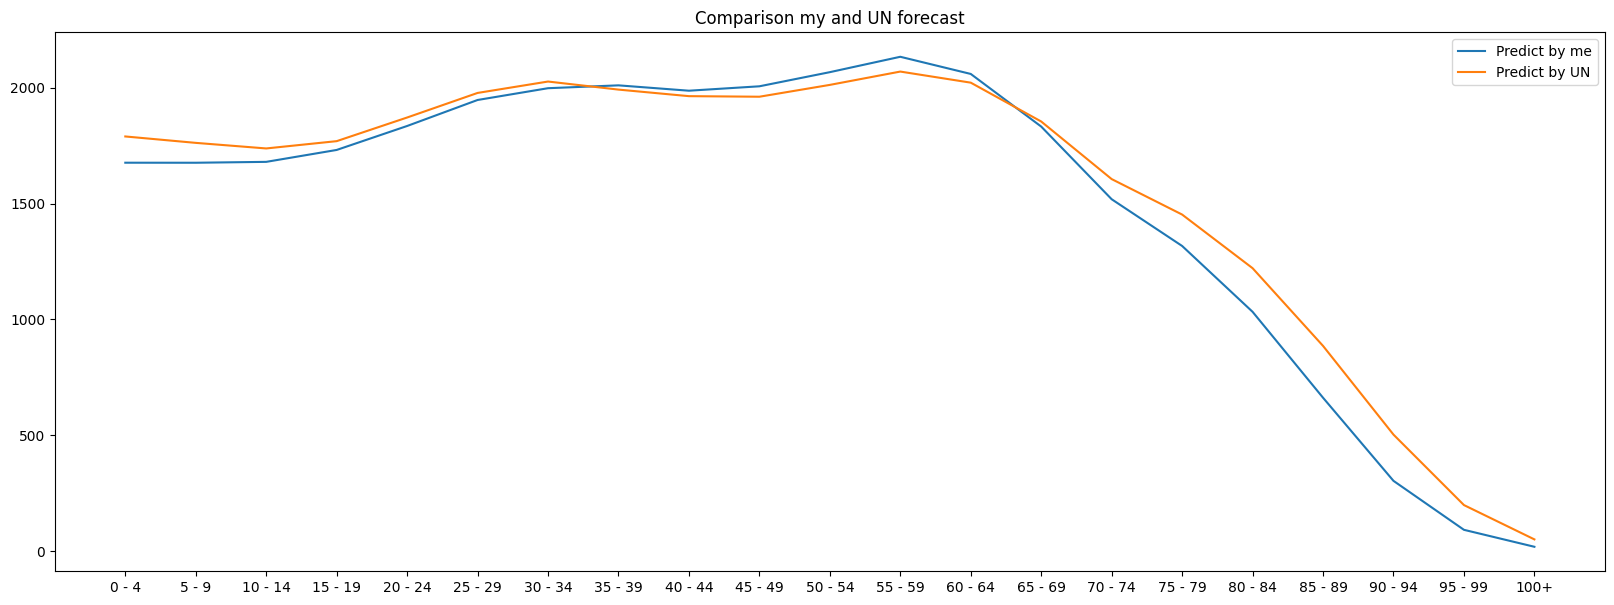

In [61]:
plot_comparison(2050)


TASK 1

Perform a sensitivity analysis for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.

In [20]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import random,math,statistics

Let's understand the variation in our parameters

1. FERTILITY RATE

In [21]:
# minimum and maximum fertility rates

min_fertility_rate = min(fertility_rates)
max_fertility_rate = max(fertility_rates)
mean_fertility_rate = statistics.mean(fertility_rates)
std_fertility_rate = statistics.stdev(fertility_rates)

In [22]:
min_fertility_rate

0.25021521729655616

In [23]:
max_fertility_rate

0.47485262597929834

In [24]:
mean_fertility_rate

0.36113091804468095

In [25]:
std_fertility_rate

0.08689365095422963

2. BOYS RATIO

In [26]:
# minimum and maximum boys to girls ratios

def boys_girls_ratio_variance(dataset_men, dataset_women, start_year, end_year, age_group):

    years = list(range(start_year, end_year + 1, 5))
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    return min(gender_ratios), max(gender_ratios), statistics.mean(gender_ratios), statistics.stdev(gender_ratios)


min_boys, max_boys, mean_boys, std_boys = boys_girls_ratio_variance(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


In [27]:
min_boys

1.0456637623954914

In [28]:
max_boys

1.0550396672931748

In [29]:
mean_boys

1.050203987680721

In [30]:
std_boys

0.002952273790148584

3. SURVIVAL RATE

In [31]:
# minimum and maximum survival rates

def min_max_mean_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min, max, and mean survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}
    mean_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

            # Update the mean survival rates for each age group
            if col in mean_survival_rates:
                mean_survival_rates[col].append(survival_rate_df[col].mean())
            else:
                mean_survival_rates[col] = [survival_rate_df[col].mean()]

    # Compute the final mean survival rate for each age group
    for col in mean_survival_rates.keys():
        mean_survival_rates[col] = statistics.mean(mean_survival_rates[col])

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)
    mean_survival_rates = pd.Series(mean_survival_rates)

    return min_survival_rates, max_survival_rates, mean_survival_rates

# Call the function
min_survival_rate, max_survival_rate, mean_survival_rate = min_max_mean_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)
print("\nMean survival rates for each age group: \n", mean_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64

Mean survival rates for each age group: 
 5 - 9      1.033516
10 - 14    1.037225
15 -

In [32]:
min_survival_rate['5 - 9']

0.9956648270454477

In [33]:
max_survival_rate['5 - 9']

1.0620637652017555

# 50 Years Sensitivity Analysis

In [34]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055]
        )
        
        total_population_by_year = res.sum(axis=1)
        Y.append(total_population_by_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)

# Initialize the list to store the results
S1_values_over_time = []

# Now Y is an array of shape (num_samples, num_years)
# We need to perform the sensitivity analysis for each year

for i in range(Y.shape[1]):
    Si = sobol.analyze(problem, Y[:, i], print_to_console=False)  # Analyze the i-th year
    S1_values_over_time.append(Si['S1'])  # Store the results
    print(f"__________________\nYear {i+1}")
    print(Si['S1'])


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_17438/4121354708.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
Year 1
[8.66901020e-01 1.57839224e-08 9.39890757e-03 5.57315763e-03
 1.01418004e-02 4.42907577e-02 4.90341002e-02 1.12728752e-02
 4.25543099e-03]
__________________
Year 2
[ 8.46888289e-01 -1.30309056e-07  8.31146241e-03  5.22342625e-03
  1.15382126e-02  5.13939681e-02  5.84401721e-02  1.37785521e-02
  4.70288630e-03]
__________________
Year 3
[ 8.28094779e-01 -2.49178319e-07  7.77494278e-03  5.48833059e-03
  1.28259886e-02  5.75693186e-02  6.70250474e-02  1.58185630e-02
  4.88688595e-03]
__________________
Year 4
[ 8.11093689e-01 -3.80916853e-07  8.10101028e-03  6.10715175e-03
  1.43435312e-02  6.34616028e-02  7.41080210e-02  1.64957745e-02
  4.94690365e-03]
__________________
Year 5
[ 8.29878687e-01 -6.20543585e-06  8.03746108e-03  6.22850886e-03
  1.43499638e-02  5.77996496e-02  6.39705947e-02  1.37351710e-02
  4.04484372e-03]
__________________
Year 6
[ 8.54915092e-01 -1.27395430e-05  8.13295044e-03  6.06177398e-03
  1.37369920e-02  4.97930304e-02  5.10982560e-02

In [35]:
S1_values_over_time

[array([8.66901020e-01, 1.57839224e-08, 9.39890757e-03, 5.57315763e-03,
        1.01418004e-02, 4.42907577e-02, 4.90341002e-02, 1.12728752e-02,
        4.25543099e-03]),
 array([ 8.46888289e-01, -1.30309056e-07,  8.31146241e-03,  5.22342625e-03,
         1.15382126e-02,  5.13939681e-02,  5.84401721e-02,  1.37785521e-02,
         4.70288630e-03]),
 array([ 8.28094779e-01, -2.49178319e-07,  7.77494278e-03,  5.48833059e-03,
         1.28259886e-02,  5.75693186e-02,  6.70250474e-02,  1.58185630e-02,
         4.88688595e-03]),
 array([ 8.11093689e-01, -3.80916853e-07,  8.10101028e-03,  6.10715175e-03,
         1.43435312e-02,  6.34616028e-02,  7.41080210e-02,  1.64957745e-02,
         4.94690365e-03]),
 array([ 8.29878687e-01, -6.20543585e-06,  8.03746108e-03,  6.22850886e-03,
         1.43499638e-02,  5.77996496e-02,  6.39705947e-02,  1.37351710e-02,
         4.04484372e-03]),
 array([ 8.54915092e-01, -1.27395430e-05,  8.13295044e-03,  6.06177398e-03,
         1.37369920e-02,  4.97930304e-

Let's visualize

In [36]:
import matplotlib.pyplot as plt

def plot_sensitivity_over_time(S1_values_over_time, param_names, forecast_years):
    plt.figure(figsize=(10,8))

    for i in range(len(param_names)):
        plt.plot(forecast_years, [values[i] for values in S1_values_over_time], label=param_names[i])
        
    plt.xlabel('Year')
    plt.ylabel('Sensitivity Index (S1)')
    plt.title('Sensitivity Indices Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


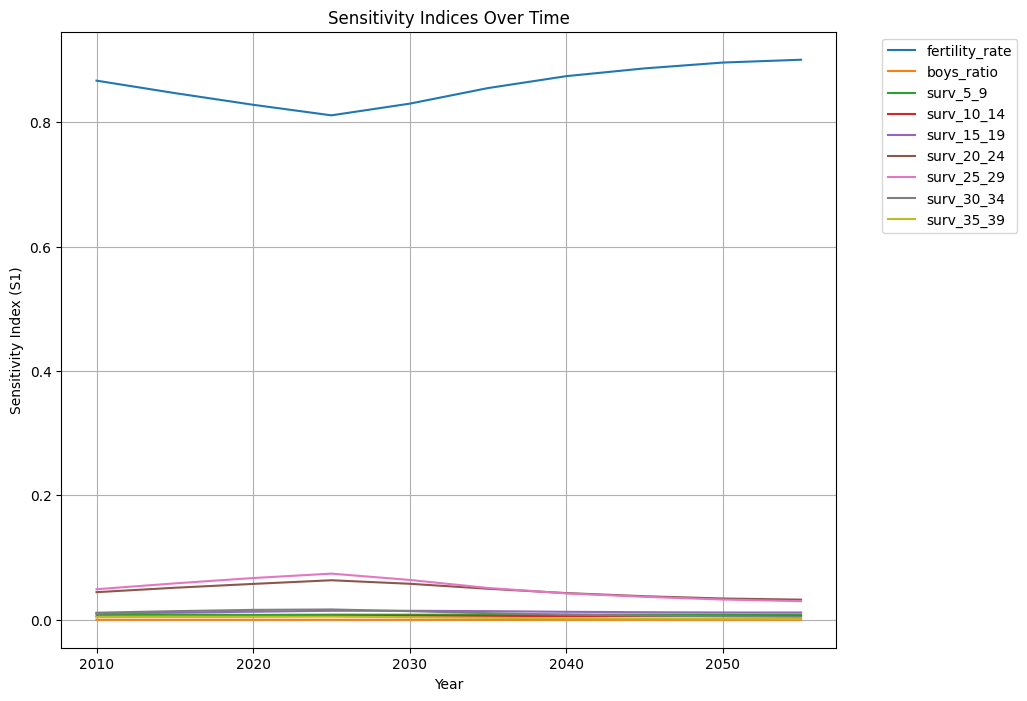

In [37]:
forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055]  # as per your example
plot_sensitivity_over_time(S1_values_over_time, problem['names'], forecast_years)


# 20 Years Sensitivity Analysis

In [38]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2010, 2015, 2020, 2025, 2030]
        )
        
        total_population_by_year = res.sum(axis=1)
        Y.append(total_population_by_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)

# Initialize the list to store the results
S1_values_over_time = []

# Now Y is an array of shape (num_samples, num_years)
# We need to perform the sensitivity analysis for each year

for i in range(Y.shape[1]):
    Si = sobol.analyze(problem, Y[:, i], print_to_console=False)  # Analyze the i-th year
    S1_values_over_time.append(Si['S1'])  # Store the results
    print(f"__________________\nPeriod {i+1}")
    print(Si['S1'])


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_17438/1703956041.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
Period 1
[8.66901020e-01 1.57839224e-08 9.39890757e-03 5.57315763e-03
 1.01418004e-02 4.42907577e-02 4.90341002e-02 1.12728752e-02
 4.25543099e-03]
__________________
Period 2
[ 8.46888289e-01 -1.30309056e-07  8.31146241e-03  5.22342625e-03
  1.15382126e-02  5.13939681e-02  5.84401721e-02  1.37785521e-02
  4.70288630e-03]
__________________
Period 3
[ 8.28094779e-01 -2.49178319e-07  7.77494278e-03  5.48833059e-03
  1.28259886e-02  5.75693186e-02  6.70250474e-02  1.58185630e-02
  4.88688595e-03]
__________________
Period 4
[ 8.11093689e-01 -3.80916853e-07  8.10101028e-03  6.10715175e-03
  1.43435312e-02  6.34616028e-02  7.41080210e-02  1.64957745e-02
  4.94690365e-03]
__________________
Period 5
[ 8.29878687e-01 -6.20543585e-06  8.03746108e-03  6.22850886e-03
  1.43499638e-02  5.77996496e-02  6.39705947e-02  1.37351710e-02
  4.04484372e-03]


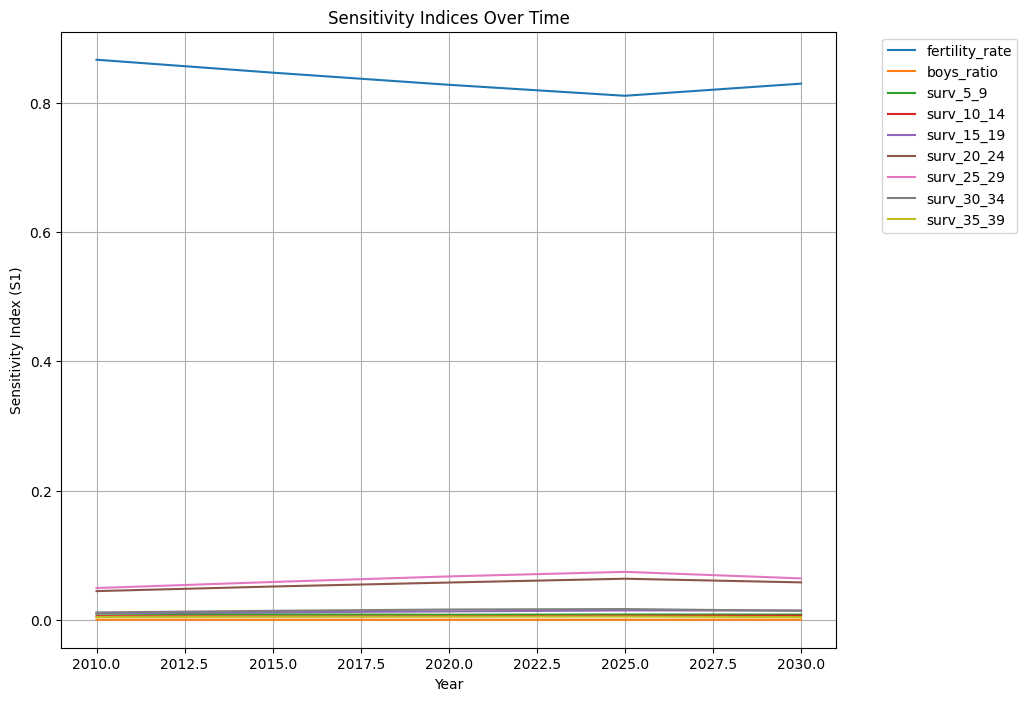

In [39]:
forecast_years = [2010, 2015, 2020, 2025, 2030]
plot_sensitivity_over_time(S1_values_over_time, problem['names'], forecast_years)

# 10 Years Sensitivity Analysis

In [40]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2010, 2015, 2020]
        )
        
        total_population_by_year = res.sum(axis=1)
        Y.append(total_population_by_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)

# Initialize the list to store the results
S1_values_over_time = []

# Now Y is an array of shape (num_samples, num_years)
# We need to perform the sensitivity analysis for each year

for i in range(Y.shape[1]):
    Si = sobol.analyze(problem, Y[:, i], print_to_console=False)  # Analyze the i-th year
    S1_values_over_time.append(Si['S1'])  # Store the results
    print(f"__________________\nPeriod {i+1}")
    print(Si['S1'])


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_17438/2707745300.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
Period 1
[8.66901020e-01 1.57839224e-08 9.39890757e-03 5.57315763e-03
 1.01418004e-02 4.42907577e-02 4.90341002e-02 1.12728752e-02
 4.25543099e-03]
__________________
Period 2
[ 8.46888289e-01 -1.30309056e-07  8.31146241e-03  5.22342625e-03
  1.15382126e-02  5.13939681e-02  5.84401721e-02  1.37785521e-02
  4.70288630e-03]
__________________
Period 3
[ 8.28094779e-01 -2.49178319e-07  7.77494278e-03  5.48833059e-03
  1.28259886e-02  5.75693186e-02  6.70250474e-02  1.58185630e-02
  4.88688595e-03]


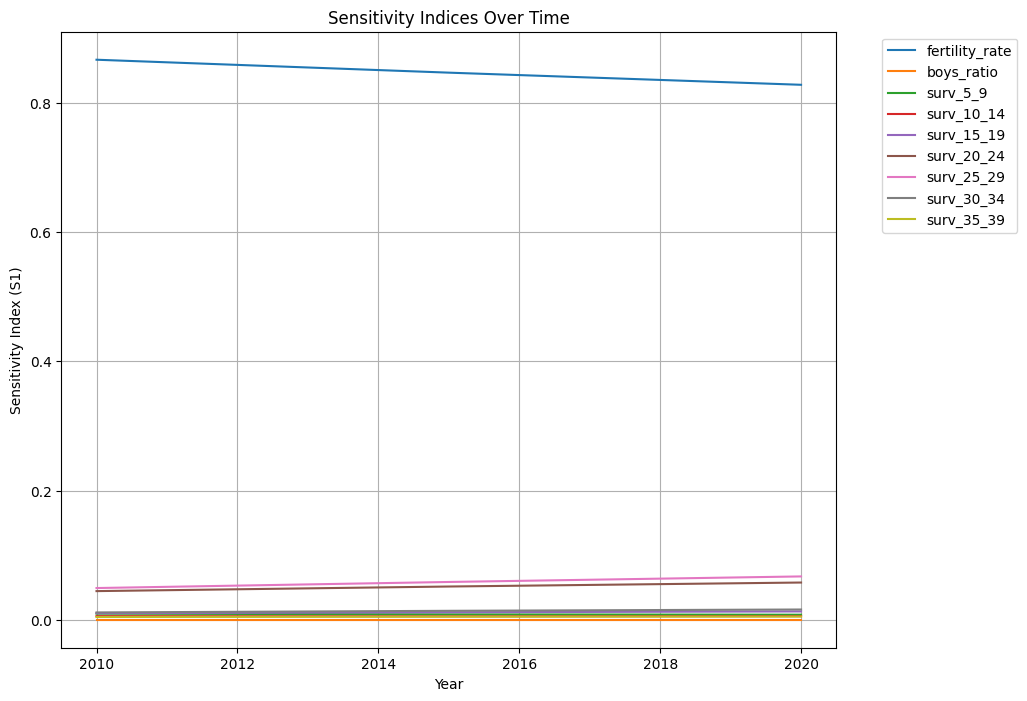

In [41]:
forecast_years = [2010, 2015, 2020]
plot_sensitivity_over_time(S1_values_over_time, problem['names'], forecast_years)

# 100 Years Sensitivity Analysis

In [42]:
problem = {
    'num_vars': 9,
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [min_fertility_rate, max_fertility_rate], 
        [min_boys, max_boys],
        [min_survival_rate['5 - 9'], max_survival_rate['5 - 9']],
        [min_survival_rate['10 - 14'], max_survival_rate['10 - 14']],
        [min_survival_rate['15 - 19'], max_survival_rate['15 - 19']],
        [min_survival_rate['20 - 24'], max_survival_rate['20 - 24']],
        [min_survival_rate['25 - 29'], max_survival_rate['25 - 29']],
        [min_survival_rate['30 - 34'], max_survival_rate['30 - 34']],
        [min_survival_rate['35 - 39'], max_survival_rate['35 - 39']]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  

        res = predictionModel(
            fertility = fertility_rate,
            boy_probability = boys_ratio,
            survival_rate = survival_rate,
            forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105]
        )
        
        total_population_by_year = res.sum(axis=1)
        Y.append(total_population_by_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)

# Initialize the list to store the results
S1_values_over_time = []

# Now Y is an array of shape (num_samples, num_years)
# We need to perform the sensitivity analysis for each year

for i in range(Y.shape[1]):
    Si = sobol.analyze(problem, Y[:, i], print_to_console=False)  # Analyze the i-th year
    S1_values_over_time.append(Si['S1'])  # Store the results
    print(f"__________________\nPeriod {i+1}")
    print(Si['S1'])


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_17438/4289985968.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
Period 1
[8.66901020e-01 1.57839224e-08 9.39890757e-03 5.57315763e-03
 1.01418004e-02 4.42907577e-02 4.90341002e-02 1.12728752e-02
 4.25543099e-03]
__________________
Period 2
[ 8.46888289e-01 -1.30309056e-07  8.31146241e-03  5.22342625e-03
  1.15382126e-02  5.13939681e-02  5.84401721e-02  1.37785521e-02
  4.70288630e-03]
__________________
Period 3
[ 8.28094779e-01 -2.49178319e-07  7.77494278e-03  5.48833059e-03
  1.28259886e-02  5.75693186e-02  6.70250474e-02  1.58185630e-02
  4.88688595e-03]
__________________
Period 4
[ 8.11093689e-01 -3.80916853e-07  8.10101028e-03  6.10715175e-03
  1.43435312e-02  6.34616028e-02  7.41080210e-02  1.64957745e-02
  4.94690365e-03]
__________________
Period 5
[ 8.29878687e-01 -6.20543585e-06  8.03746108e-03  6.22850886e-03
  1.43499638e-02  5.77996496e-02  6.39705947e-02  1.37351710e-02
  4.04484372e-03]
__________________
Period 6
[ 8.54915092e-01 -1.27395430e-05  8.13295044e-03  6.06177398e-03
  1.37369920e-02  4.97930304e-02  5.

In [62]:
Y

array([[25793.514906817254, 27422.24117807161, 29018.276281955892, ...,
        56690.867321641934, 60415.51232185894, 64663.42224132427],
       [26668.44568963501, 29260.59697090561, 31913.79092540824, ...,
        245631.96727487684, 294577.7843419922, 354139.49012607016],
       [25793.50758890264, 27422.392446922622, 29018.743057434433, ...,
        57418.9553156012, 61278.21072857654, 65680.11242631158],
       ...,
       [25944.458413668937, 27752.677297187092, 29549.746899917947, ...,
        76911.22196011567, 84266.00136438086, 92751.95877623843],
       [25946.398189577354, 27761.007902365967, 29571.6277571435, ...,
        77745.29305647255, 85254.73243813521, 93921.77444374555],
       [25981.823175820704, 27837.20966001473, 29691.568346470813, ...,
        79078.32985445058, 86761.37360545047, 95635.89340646696]],
      dtype=object)

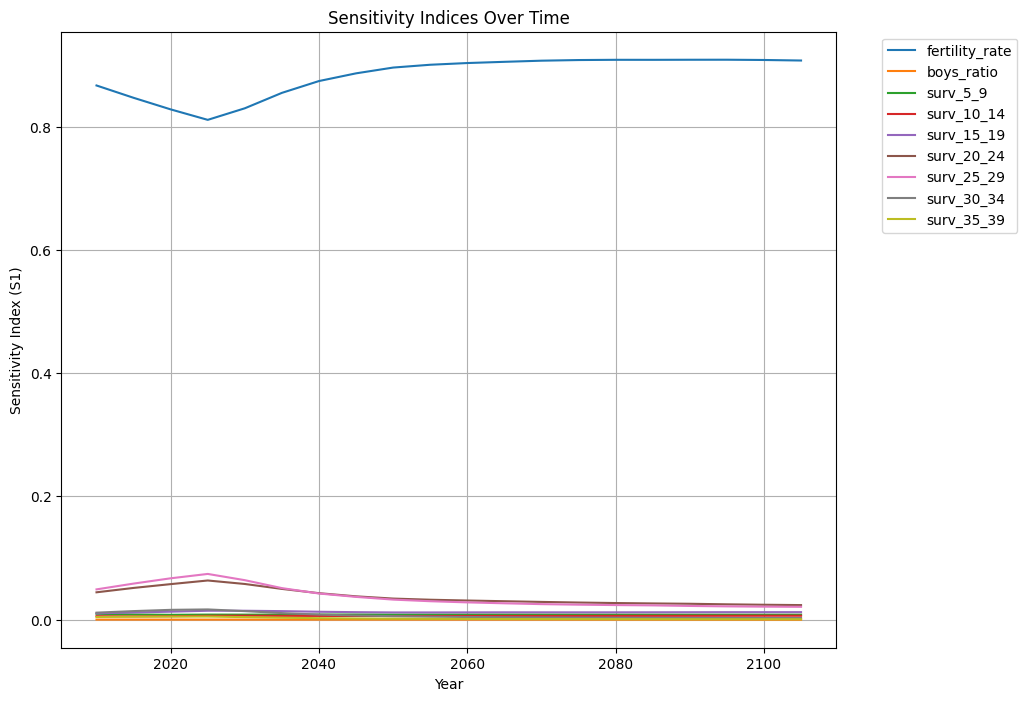

In [43]:
forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105]
plot_sensitivity_over_time(S1_values_over_time, problem['names'], forecast_years)

# Based on all ranges of parameter values, perform an uncertainty analysis in the form of a graph with prediction intervals of the results (calculated based on various scenarios, see slide 7). The values ​​between the boundaries can be considered evenly distributed

ANALYTICAL METHOD (This is Not Monte Carlo-based uncertainty propagation method known as the Saltelli method)

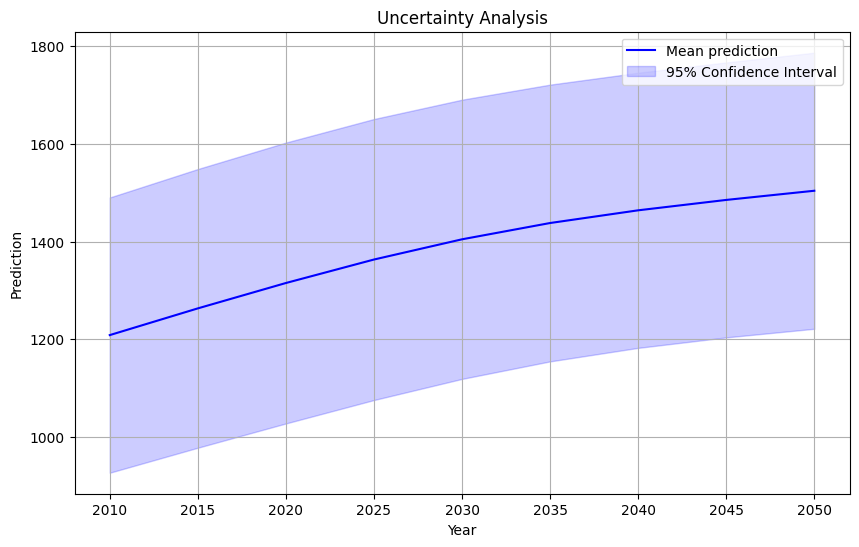

In [44]:
# Based on all ranges of parameter values, perform an uncertainty analysis in 
# the form of a graph with prediction intervals of the results 
# (calculated based on various scenarios, see slide 7). The values ​​between the boundaries can be considered evenly distributed.

forecast_years = [2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

predictions = predictionModel(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years
)

predictions_array = predictions.values  # assuming 'predictions' is your DataFrame

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean, lower and upper bounds for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    lower_bound[i] = mean_prediction[i] - 1.96 * std_error  # lower bound of 95% CI
    upper_bound[i] = mean_prediction[i] + 1.96 * std_error  # upper bound of 95% CI

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()



In [45]:
predictions

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2010,1526.312547,1552.274975,1617.702997,1731.080726,1803.741244,1793.70456,1704.188532,1775.993879,1834.607622,1839.185879,...,1589.898968,1425.68835,1060.731498,805.880055,621.825686,490.395597,295.062611,115.084051,30.96122,4.89335
2015,1573.860524,1551.477588,1569.757008,1658.185085,1820.31228,1918.122023,1882.910309,1760.048336,1810.259627,1851.213391,...,1739.54274,1548.77082,1356.445443,971.381317,692.59144,481.176917,316.380138,141.256195,38.173801,6.84981
2020,1615.488236,1599.809511,1568.950641,1609.039275,1743.659108,1935.743879,2013.515386,1944.628247,1794.006433,1826.645012,...,1818.103649,1694.543546,1473.550038,1242.185947,834.826946,535.936391,310.43268,151.461598,46.855197,8.445509
2025,1652.66243,1642.123559,1617.826888,1608.21273,1691.979992,1854.229894,2032.013625,2079.51429,1982.147599,1810.244704,...,1829.993291,1771.07221,1612.242867,1349.426296,1067.562534,646.000102,345.760913,148.614354,50.240366,10.366167
2030,1656.17315,1679.910661,1660.617485,1658.312077,1691.110841,1799.273646,1946.44573,2098.618864,2119.636114,2000.088811,...,1805.706535,1782.654286,1685.054682,1476.436405,1159.727301,826.09397,416.768834,165.527143,49.295925,11.115097
2035,1643.380971,1683.479265,1698.830153,1702.173484,1743.792645,1798.349379,1888.75636,2010.246228,2139.109288,2138.821789,...,1789.494221,1758.995789,1696.07424,1543.114953,1268.882644,897.412282,532.956914,199.520975,54.905959,10.90615
2040,1634.501389,1670.476174,1702.438947,1741.342402,1789.914965,1854.371899,1887.786127,1950.66592,2049.031604,2158.471223,...,1977.162182,1743.202862,1673.56479,1553.206284,1326.187688,981.878126,578.96813,255.144037,66.181837,12.147305
2045,1649.146541,1661.450191,1689.289413,1745.041504,1831.102913,1903.418976,1946.594797,1949.663884,1988.301763,2067.57821,...,2114.304891,1926.016153,1658.538894,1532.592906,1334.860405,1026.221525,633.461513,277.171122,84.632211,14.641962
2050,1676.493822,1676.336805,1680.161777,1731.562911,1834.992692,1947.218779,1998.081118,2010.400182,1987.280394,2006.298679,...,2133.729086,2059.611198,1832.473299,1518.832709,1317.144804,1032.932587,662.069786,303.258901,91.938675,18.723892


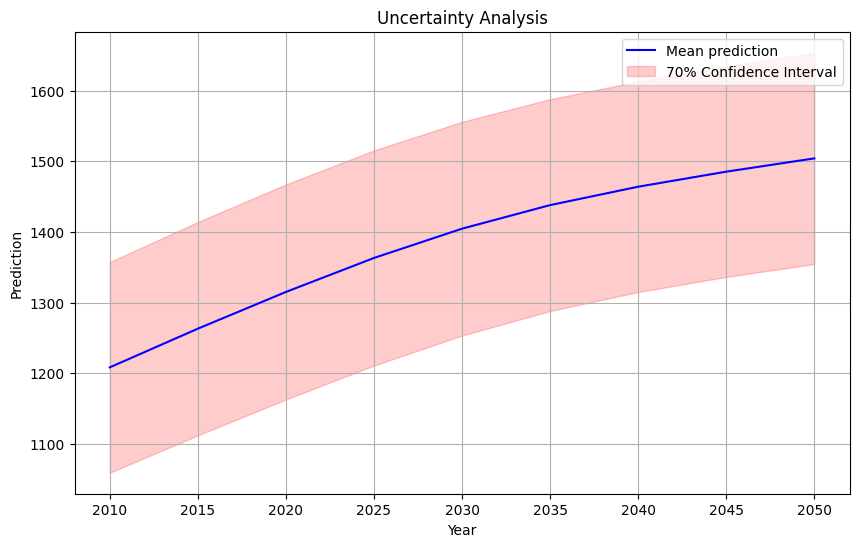

In [46]:
from scipy.stats import norm

# Initialize arrays for mean and confidence interval
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean and confidence interval for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    
    z_score = norm.ppf((100 + 70) / 200)  # Convert confidence level to z-score
    lower_bound[i] = mean_prediction[i] - z_score * std_error
    upper_bound[i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='70% Confidence Interval')
plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


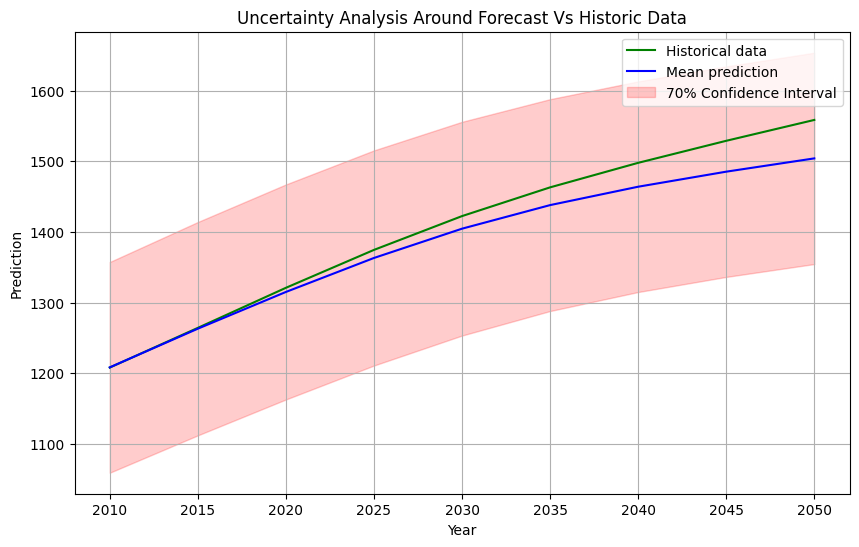

In [47]:
# Assume historical_data is your DataFrame with historical populations
historical_years = both_2010_2050_medium_fertility.index.values
historical_population = both_2010_2050_medium_fertility.mean(axis=1) # Sum across age groups for total population

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(historical_years, historical_population, color='g', label='Historical data')
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='70% Confidence Interval')
plt.title('Uncertainty Analysis Around Forecast Vs Historic Data')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


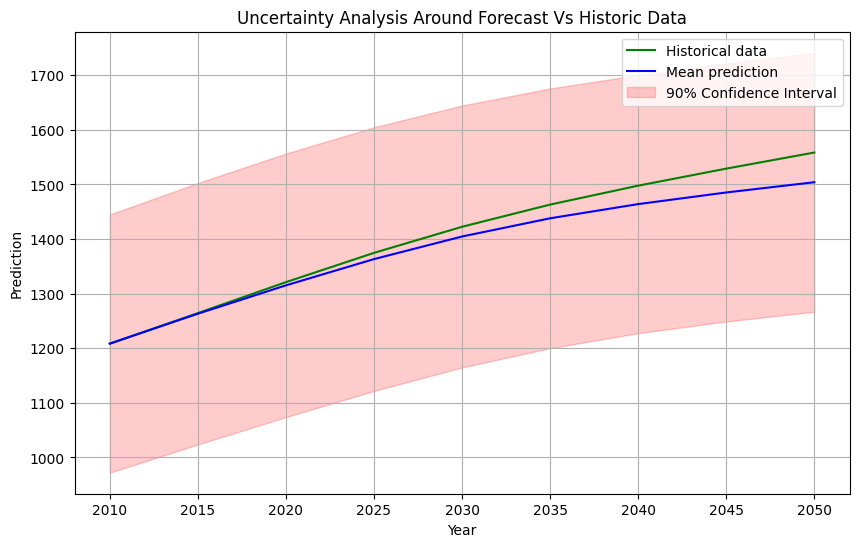

In [48]:
from scipy.stats import norm

# Initialize arrays for mean and confidence interval
mean_prediction = np.zeros(predictions_array.shape[0])
lower_bound = np.zeros(predictions_array.shape[0])
upper_bound = np.zeros(predictions_array.shape[0])

# Calculate mean and confidence interval for each year
for i in range(predictions_array.shape[0]):
    mean_prediction[i] = np.mean(predictions_array[i, :])
    std_error = np.std(predictions_array[i, :]) / np.sqrt(predictions_array.shape[1])
    
    z_score = norm.ppf((100 + 90) / 200)  # Convert confidence level to z-score
    lower_bound[i] = mean_prediction[i] - z_score * std_error
    upper_bound[i] = mean_prediction[i] + z_score * std_error

# Assume historical_data is your DataFrame with historical populations
historical_years = both_2010_2050_medium_fertility.index.values
historical_population = both_2010_2050_medium_fertility.mean(axis=1) # Sum across age groups for total population

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(historical_years, historical_population, color='g', label='Historical data')
plt.plot(forecast_years, mean_prediction, color='b', label='Mean prediction')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='r', alpha=0.2, label='90% Confidence Interval')
plt.title('Uncertainty Analysis Around Forecast Vs Historic Data')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


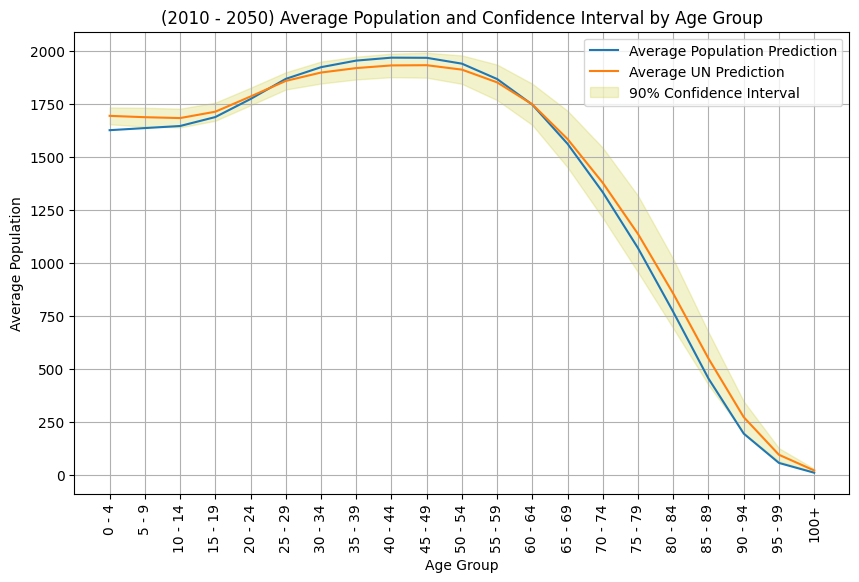

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 90% confidence interval
confidence_level = 90
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds = []
upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    lower_bound = average_historic[age_group] - z_score * std_error
    upper_bound = average_historic[age_group] + z_score * std_error
    
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')
plt.fill_between(predictions.columns, lower_bounds, upper_bounds, alpha=0.2, color='y', label='90% Confidence Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()


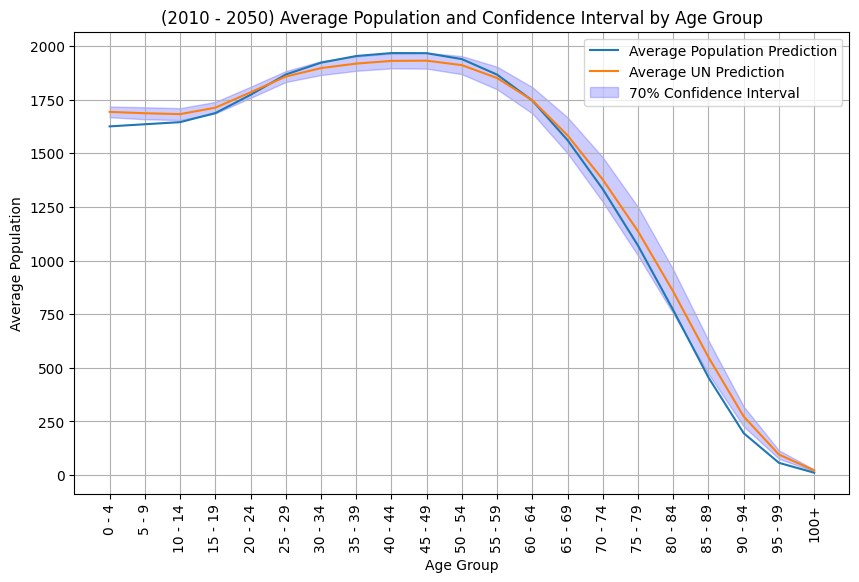

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% confidence interval
confidence_level = 70
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds = []
upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    lower_bound = average_historic[age_group] - z_score * std_error
    upper_bound = average_historic[age_group] + z_score * std_error
    
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')
plt.fill_between(predictions.columns, lower_bounds, upper_bounds, alpha=0.2, color='b', label='70% Confidence Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()


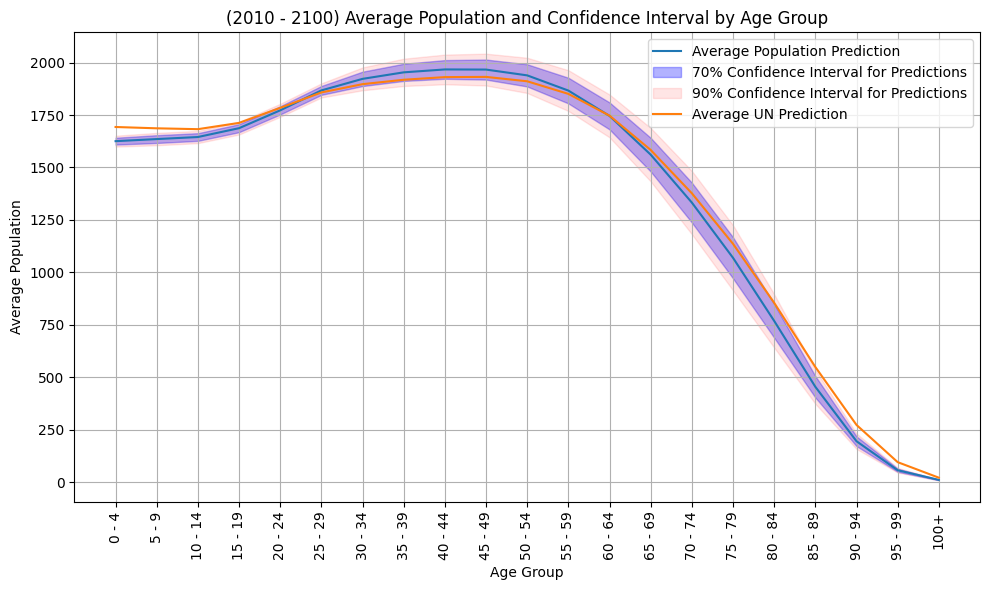

In [51]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% and 90% confidence intervals for predictions
confidence_level_70 = 70
z_score_70 = norm.ppf((100 + confidence_level_70) / 200)  # Convert confidence level to z-score

confidence_level_90 = 90
z_score_90 = norm.ppf((100 + confidence_level_90) / 200)  # Convert confidence level to z-score

lower_bounds_70 = []
upper_bounds_70 = []
lower_bounds_90 = []
upper_bounds_90 = []

for age_group in predictions.columns:
    std_error = predictions[age_group].std() / np.sqrt(len(predictions))
    
    lower_bound_70 = average_population[age_group] - z_score_70 * std_error
    upper_bound_70 = average_population[age_group] + z_score_70 * std_error
    
    lower_bound_90 = average_population[age_group] - z_score_90 * std_error
    upper_bound_90 = average_population[age_group] + z_score_90 * std_error
    
    lower_bounds_70.append(lower_bound_70)
    upper_bounds_70.append(upper_bound_70)
    
    lower_bounds_90.append(lower_bound_90)
    upper_bounds_90.append(upper_bound_90)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.fill_between(predictions.columns, lower_bounds_70, upper_bounds_70, alpha=0.3, color='b', label='70% Confidence Interval for Predictions')
plt.fill_between(predictions.columns, lower_bounds_90, upper_bounds_90, alpha=0.1, color='r', label='90% Confidence Interval for Predictions')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')

plt.title('(2010 - 2100) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()


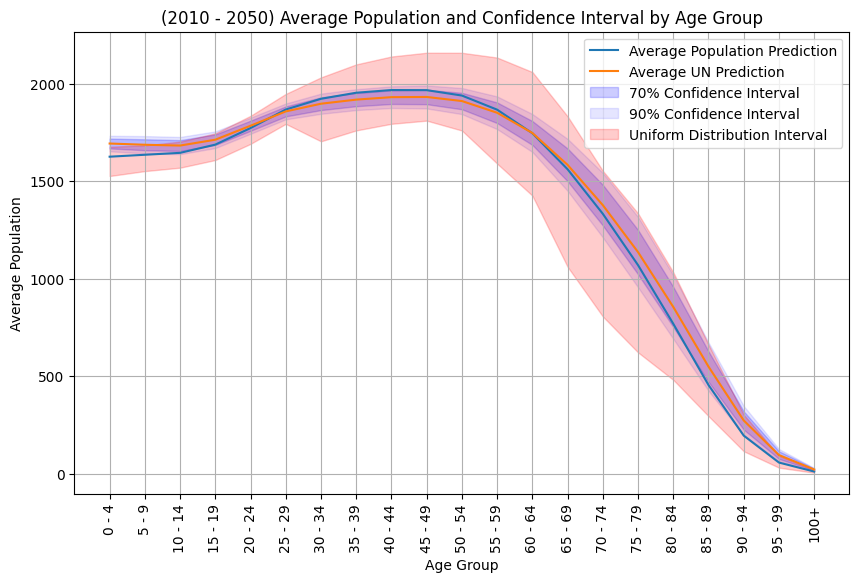

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate the average population over the years for each age group
average_population = predictions.mean()
average_historic = both_2010_2050_medium_fertility.mean()

# Calculate the 70% confidence interval
confidence_level = 70
z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score

lower_bounds_70 = []
upper_bounds_70 = []
lower_bounds_90 = []
upper_bounds_90 = []
uniform_lower_bounds = []
uniform_upper_bounds = []

for age_group in both_2010_2050_medium_fertility.columns:
    std_error = both_2010_2050_medium_fertility[age_group].std() / np.sqrt(len(both_2010_2050_medium_fertility))
    
    # For Normal Distribution
    lower_bound_70 = average_historic[age_group] - z_score * std_error
    upper_bound_70 = average_historic[age_group] + z_score * std_error
    
    # For 90% confidence interval
    z_score_90 = norm.ppf((100 + 90) / 200)
    lower_bound_90 = average_historic[age_group] - z_score_90 * std_error
    upper_bound_90 = average_historic[age_group] + z_score_90 * std_error
    
    # For Uniform Distribution
    uniform_lower_bound = predictions[age_group].min()
    uniform_upper_bound = predictions[age_group].max()
    
    lower_bounds_70.append(lower_bound_70)
    upper_bounds_70.append(upper_bound_70)
    lower_bounds_90.append(lower_bound_90)
    upper_bounds_90.append(upper_bound_90)
    uniform_lower_bounds.append(uniform_lower_bound)
    uniform_upper_bounds.append(uniform_upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions.columns, average_population, label='Average Population Prediction')
plt.plot(both_2010_2050_medium_fertility.columns, average_historic, label='Average UN Prediction')

# Normal Distribution Confidence Intervals
plt.fill_between(predictions.columns, lower_bounds_70, upper_bounds_70, alpha=0.2, color='b', label='70% Confidence Interval')
plt.fill_between(predictions.columns, lower_bounds_90, upper_bounds_90, alpha=0.1, color='b', label='90% Confidence Interval')

# Uniform Distribution Confidence Intervals
plt.fill_between(predictions.columns, uniform_lower_bounds, uniform_upper_bounds, alpha=0.2, color='r', label='Uniform Distribution Interval')

plt.title('(2010 - 2050) Average Population and Confidence Interval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.show()


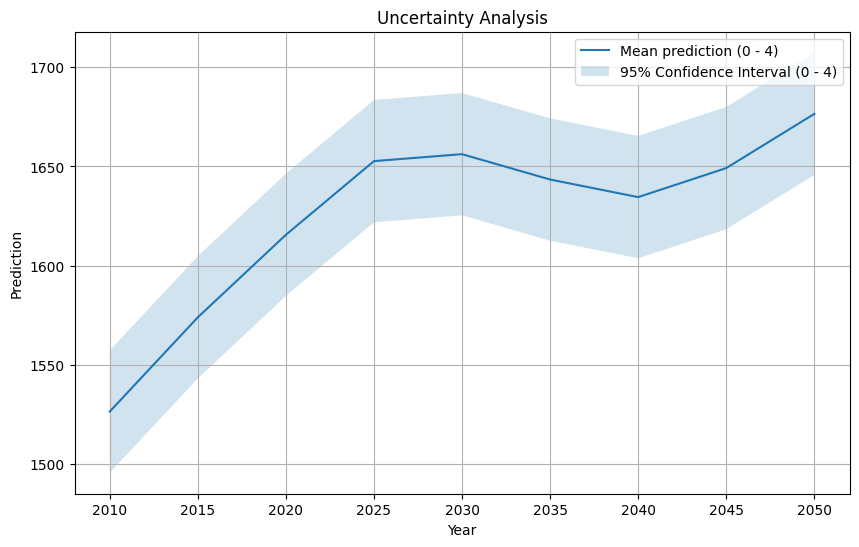

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age groups to plot
age_groups = ['0 - 4']

# Initialize arrays for mean, lower and upper bounds
mean_predictions = {age_group: np.zeros(len(forecast_years)) for age_group in age_groups}
lower_bounds = {age_group: np.zeros(len(forecast_years)) for age_group in age_groups}
upper_bounds = {age_group: np.zeros(len(forecast_years)) for age_group in age_groups}

# Calculate mean, lower and upper bounds for each year and age group
for i, year in enumerate(forecast_years):
    for age_group in age_groups:
        mean_predictions[age_group][i] = predictions.loc[year, age_group]
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + 95) / 200)  # Convert confidence level to z-score
        lower_bounds[age_group][i] = mean_predictions[age_group][i] - z_score * std_error
        upper_bounds[age_group][i] = mean_predictions[age_group][i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

for age_group in age_groups:
    plt.plot(forecast_years, mean_predictions[age_group], label=f'Mean prediction ({age_group})')
    plt.fill_between(forecast_years, lower_bounds[age_group], upper_bounds[age_group], alpha=0.2, label=f'95% Confidence Interval ({age_group})')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


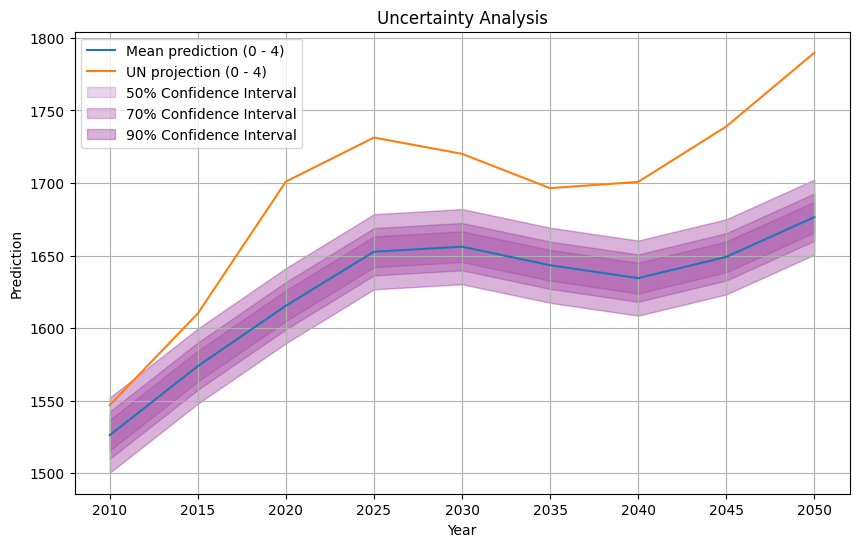

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '0 - 4'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


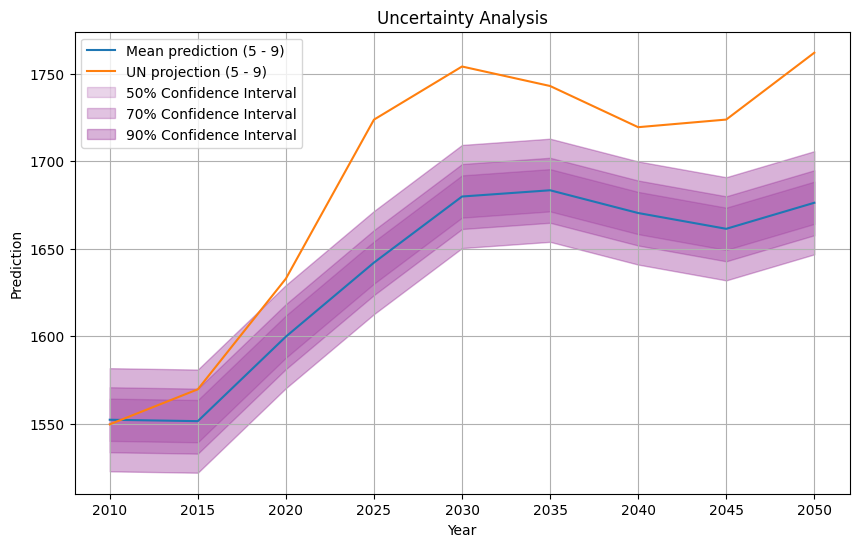

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '5 - 9'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


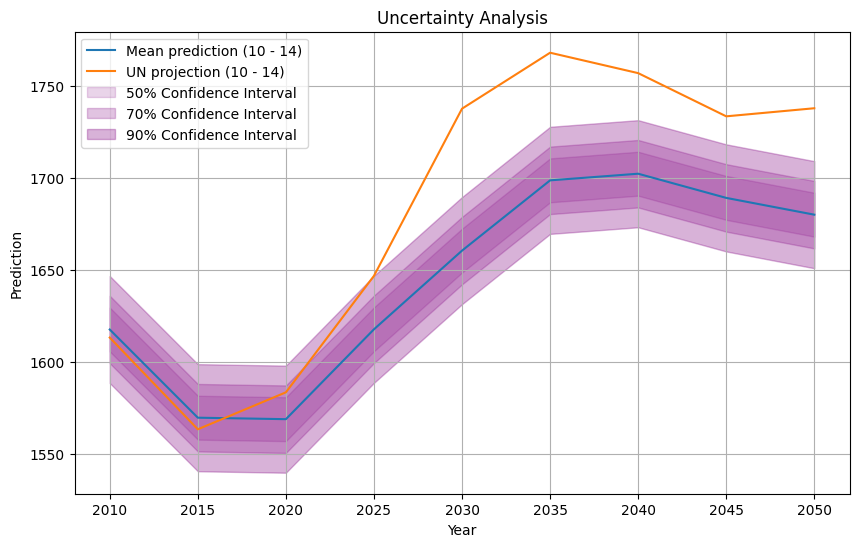

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '10 - 14'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


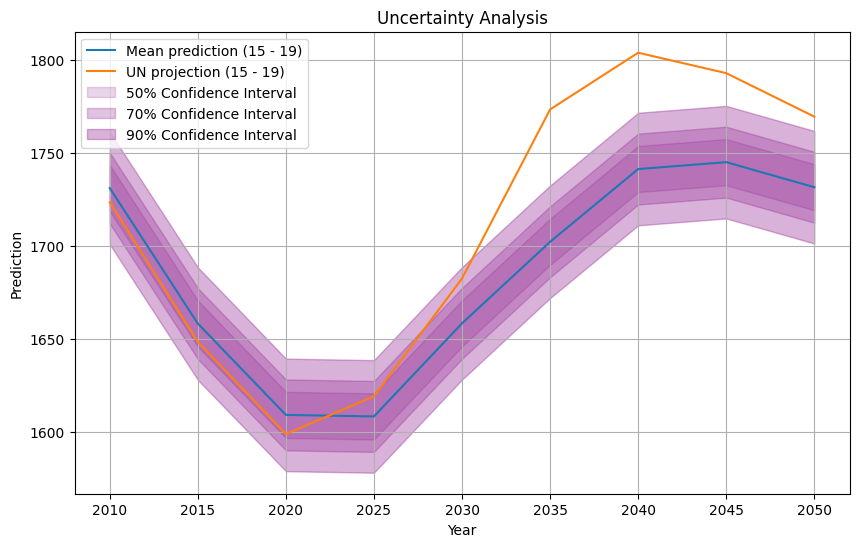

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '15 - 19'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


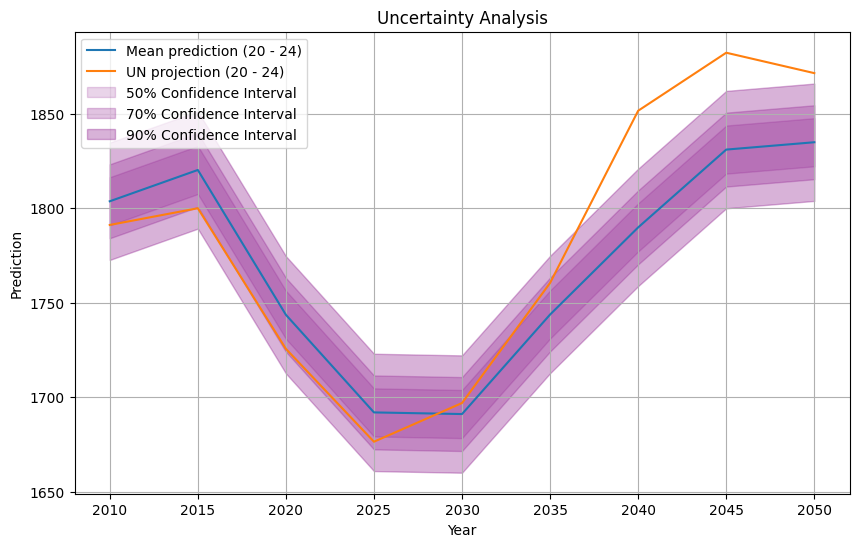

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '20 - 24'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


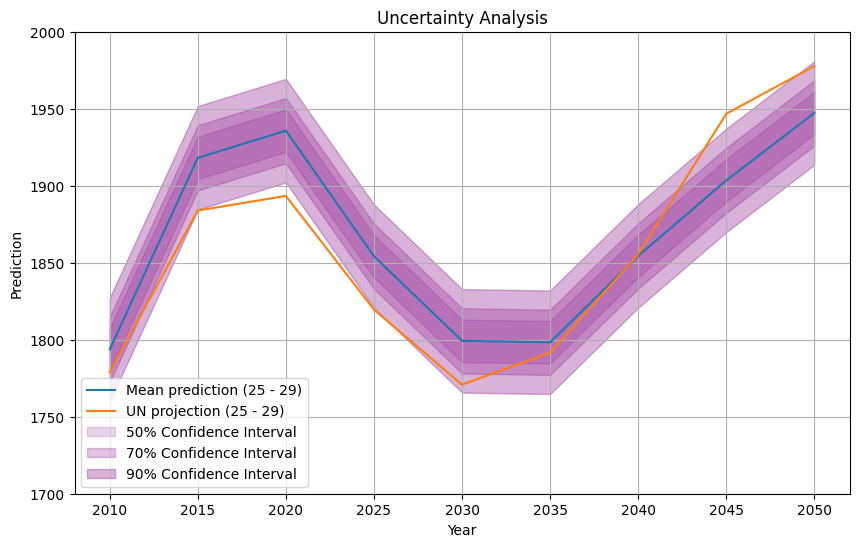

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Age group to plot
age_group = '25 - 29'

# Confidence levels to plot
confidence_levels = [50, 70, 90]

# Initialize arrays for mean, lower and upper bounds
mean_prediction = np.zeros(len(forecast_years))
lower_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}
upper_bounds = {confidence_level: np.zeros(len(forecast_years)) for confidence_level in confidence_levels}

# Calculate mean, lower and upper bounds for each year
for i, year in enumerate(forecast_years):
    mean_prediction[i] = predictions.loc[year, age_group]
    for confidence_level in confidence_levels:
        std_error = predictions[age_group].std() / np.sqrt(predictions.shape[0])
        z_score = norm.ppf((100 + confidence_level) / 200)  # Convert confidence level to z-score
        lower_bounds[confidence_level][i] = mean_prediction[i] - z_score * std_error
        upper_bounds[confidence_level][i] = mean_prediction[i] + z_score * std_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean prediction
plt.plot(forecast_years, mean_prediction, label=f'Mean prediction ({age_group})')

# Plot UN projection
plt.plot(both_2010_2050_medium_fertility.index, both_2010_2050_medium_fertility[age_group], label=f'UN projection ({age_group})')

# Plot confidence intervals with different opacities
for confidence_level in confidence_levels:
    plt.fill_between(forecast_years, lower_bounds[confidence_level], upper_bounds[confidence_level], alpha=0.3 * (confidence_level / max(confidence_levels)), color='purple', label=f'{confidence_level}% Confidence Interval')

# Set y-axis range
plt.ylim([1700, 2000])

plt.title('Uncertainty Analysis')
plt.xlabel('Year')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


Monte Carlo-based uncertainty propagation method known as the Saltelli method (a variant of the Sobol sequence).

Initial Profiles: We would need the initial age group profiles for both Male (init_profile_M) and Female (init_profile_F). These would typically be numpy arrays representing the population distribution across age groups for both genders at the start of the simulation period.

Survival Rates: We would need the survival rates (SR) for each age group. These would also typically be numpy arrays, representing the probability of survival from one age group to the next.

Fertility Rate: We would need the fertility rate (FR). This is a single scalar value representing the average number of children a woman is expected to have during her reproductive years.

Boy-Girl Ratio: We would need the boy-girl ratio (BG), representing the proportion of newborns that are male.

Age Groups: The GROUPS variable seems to be a list of the age groups being modeled, like ['0 - 4', '5 - 9', '10 - 14', ...].

Ranges for Parameters: We need the ranges for the parameters (FRmin, FRmax, BGmin, BGmax, SRmin, SRmax). These ranges define the uncertainty in the parameters and are used to generate the samples for the Saltelli method.

Once we have these inputs, we can plug them into the provided functions and perform the uncertainty analysis. The full_analysis_unce() function seems to be the main entry point for the analysis. It runs the model for each age group, collects the results, and then computes the percentiles for the predictions using the compute_percentiles() function. The results are then visualized using the plot_unce() function.

Do you have this data available, or do you need help generating it? Please note that the model used here (Model_unce()) seems to be quite specific to this problem and might not work for other types of population models. If you're using a different model, we would need to modify the Model_unce() function accordingly.

Conclustion

Fertility rates in a population is the most important factor that affects it’s size
The survival rate of people within the age group 20 - 24 AND 25 to 29 also has an impact on the population size
